## Correlation Techniques for Exploring Data Relationships

#### Correlation Techniques
    1. Pearson Correlation Coefficient
    2. Spearman's Rank Correlation Coefficient
    3. Point-Biserial Correlation Coefficient
    4. Phi Coefficient
    5. Cramer's V
    6. Distance Correlation

Check out the complete article [here](https://medium.com/@sundharesansk11/correlation-techniques-for-exploring-data-relationships-bf15cdf3710f).

In [2]:
import matplotlib.pyplot as plt

def plot(x, y):
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='b', label='y = f(x)')
    plt.title("Plot of y vs. x")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

#### 1. Pearson Correlation Coefficient
The Pearson correlation coefficient (often denoted as r) is a measure of the linear relationship between two continuous variables. It quantifies the degree to which two variables are linearly related.

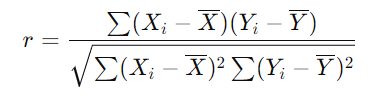

Pearson correlation coefficient: 1.0


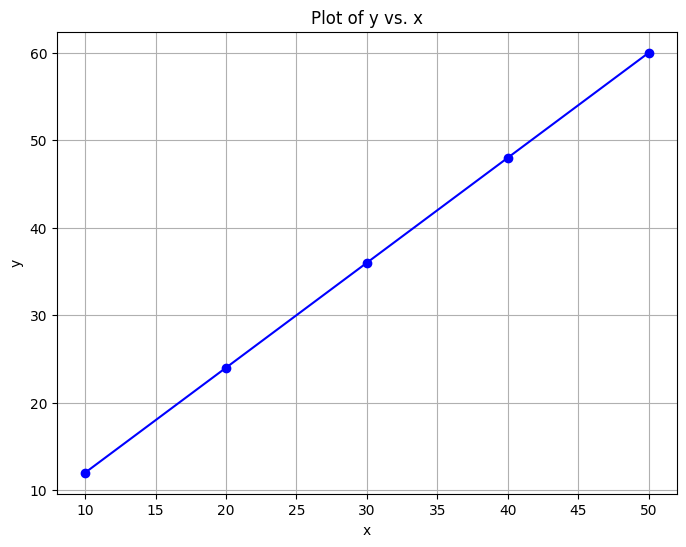

In [3]:
# pearson coefficient

def pearson_correlation(x, y):
    if len(x) != len(y):
        raise ValueError("Lists x and y must have the same length")
    n = len(x)

    x_mean = sum(x)/n
    y_mean = sum(y)/n

    numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    denominator_x = sum((x[i] - x_mean)**2 for i in range(n))
    denominator_y = sum((y[i] - y_mean)**2 for i in range(n))

    denominator = (denominator_x * denominator_y) ** 0.5

    return numerator / denominator if denominator != 0 else 0

x = [10, 20, 30, 40, 50]
y = [12, 24, 36, 48, 60]

correlation = pearson_correlation(x, y)
print("Pearson correlation coefficient:", correlation)
plot(x,y)


#### 2. Spearman's Rank Correlation Coefficient
Spearman's rank correlation coefficient (ρ) formula quantifies the degree and direction of association between two ranked variables. It measures the monotonicity of a relationship between two variables, that is, how well a monotonic function can represent the relationship between two variables.

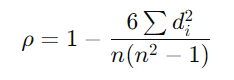

In [4]:
def rank(data):
    sorted_indices = sorted(range(len(data)), key = lambda i: data[i])
    ranks = [0] * len(data)
    for rank, index in enumerate(sorted_indices):
        ranks[index] = rank + 1
    return ranks

def spearman_rank_correlation(x, y):
    if len(x) != len(y):
        raise ValueError("Lists x and y must have the same length")

    rank_x = rank(x)
    rank_y = rank(y)

    d = [(rank_x[i] - rank_y[i]) for i in range(len(x))]
    d_squared = [diff ** 2 for diff in d]

    n = len(x)
    numerator = 6 * sum(d_squared)
    denominator = n * (n**2 - 1)

    return 1-(numerator/denominator)

x = [10, 20, 45, 21, 30, 43, 33, 16, 15]
y = [12, 30, 44, 23, 33, 47, 31, 14, 13]

correlation = spearman_rank_correlation(x, y)
print("Spearman's Rank Correlation Coefficient:", correlation)

Spearman's Rank Correlation Coefficient: 0.95


#### 3. Point-Biserial Correlation Coefficient
The Point-Biserial Correlation Coefficient is a special case of the Pearson correlation coefficient used to measure the strength and direction of the association between a continuous variable and a binary (dichotomous) variable. It is particularly useful when you want to assess how a continuous variable differs between two groups defined by a binary variable.

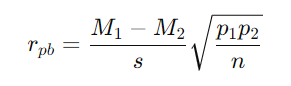

In [5]:
def point_biserial_correlation(x, y):
    if not all(val in [0, 1] for val in y):
        raise ValueError("y must be a binary variable (containing only 0s and 1s)")

    # Split x into two groups based on the binary variable y
    x_0 = [x[i] for i in range(len(x)) if y[i]==0]
    x_1 = [x[i] for i in range(len(x)) if y[i]==1]

    # calculate means for the groups
    mean_x_0 = sum(x_0)/len(x_0) if len(x_0)>0 else 0
    mean_x_1 = sum(x_1)/len(x_1) if len(x_1)>0 else 0


    # Calculate the mean and standard deviation of x
    mean_x = sum(x)/len(x)
    std_x = (sum((xi - mean_x)**2 for xi in x)/len(x))** 0.5
    # Calculate the proportion of each group
    n_0 = len(x_0)
    n_1 = len(x_1)
    n = len(y)

    p0 = n_0 / n
    p1 = n_1 / n
    # Calculate the Point-Biserial Correlation Coefficient
    r_pb = (mean_x_1 - mean_x_0) / std_x * (p0 * p1) ** 0.5

    return r_pb

x = [4, 15, 8, 6, 10, 7, 13, 12, 11, 2]
y = [0, 1, 1, 0, 1, 0, 1, 1, 1, 0]


correlation = point_biserial_correlation(x, y)
print("Point-Biserial Correlation Coefficient:", correlation)

Point-Biserial Correlation Coefficient: 0.8437499999999999


#### 4. Phi Coefficient
The Phi Coefficient (ϕ), also known as the mean square contingency coefficient, is a measure of the strength of association between two binary variables. It is a special case of the Pearson correlation coefficient, applied to dichotomous data.

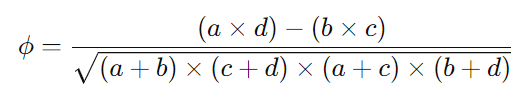

In [6]:
def phi_coefficient(x, y):
    if not (all(val in [0, 1] for val in x) and all(val in [0, 1] for val in y)):
        raise ValueError("Both x and y must be binary variables (containing only 0s and 1s)")

    # Calculate the contingency table components
    n00 = sum(1 for i in range(len(x)) if x[i] == 0 and y[i] == 0)
    n01 = sum(1 for i in range(len(x)) if x[i] == 0 and y[i] == 1)
    n10 = sum(1 for i in range(len(x)) if x[i] == 1 and y[i] == 0)
    n11 = sum(1 for i in range(len(x)) if x[i] == 1 and y[i] == 1)

    print("Contingency Table:")
    print(f"n00 (x=0, y=0): {n00}")
    print(f"n01 (x=0, y=1): {n01}")
    print(f"n10 (x=1, y=0): {n10}")
    print(f"n11 (x=1, y=1): {n11}")

    # Calculate the Phi coefficient
    numerator = n11 * n00 - n10 * n01
    denominator = ((n11 + n10) * (n11 + n01) * (n00 + n10) * (n00 + n01)) ** 0.5

    return numerator / denominator if denominator != 0 else 0

x = [1] * 30 + [1] * 10 + [0] * 20 + [0] * 40
y = [1] * 30 + [0] * 10 + [1] * 20 + [0] * 40


phi = phi_coefficient(x, y)
print("Phi Coefficient:", phi)


Contingency Table:
n00 (x=0, y=0): 40
n01 (x=0, y=1): 20
n10 (x=1, y=0): 10
n11 (x=1, y=1): 30
Phi Coefficient: 0.4082482904638631


#### 5. Cramer's V Coefficient
 A Measure of Association for Categorical Variables

Cramer's V coefficient is a statistical measure used to assess the strength of association between two nominal (categorical) variables. It is derived from the chi-squared statistic and provides a value between 0 and 1.

Chi-Square Statistic = 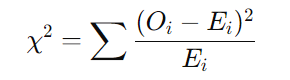

Cramer's V = 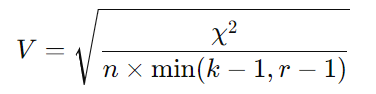

In [8]:
def cramers_v(x, y):
    if len(x) != len(y):
        raise ValueError("Lists x and y must have the same length")

    # Create the contingency table
    unique_x = list(set(x))
    unique_y = list(set(y))

    contingency_table = [[0 for _ in range(len(unique_y))] for _ in range(len(unique_x))]
    for i in range(len(x)):
        contingency_table[unique_x.index(x[i])][unique_y.index(y[i])] += 1
    print("Contingency table:", contingency_table)
    # Calculate the chi-squared statistic
    chi2 = 0
    n = len(x)
    row_totals = [sum(row) for row in contingency_table]
    col_totals = [sum(col) for col in zip(*contingency_table)]

    for i in range(len(unique_x)):
        for j in range(len(unique_y)):
            expected = (row_totals[i] * col_totals[j]) / n
            chi2 += (contingency_table[i][j] - expected) ** 2 / expected

    # Calculate Cramér's V
    min_dim = min(len(unique_x) - 1, len(unique_y) - 1)
    cramers_v_value = (chi2 / (n * min_dim)) ** 0.5

    return cramers_v_value

x = ['A', 'B', 'A', 'B', 'A', 'B', 'C', 'C']
y = ['X', 'Y', 'X', 'Y', 'Z', 'Z', 'X', 'Y']

cramers_v_value = cramers_v(x, y)
print("Cramér's V:", cramers_v_value)

Contingency table: [[0, 1, 1], [1, 0, 2], [1, 2, 0]]
Cramér's V: 0.5270462766947299


#### 6. Distance Correlation
A Measure of Association Between Two Variables

Distance correlation is a statistical measure that captures both linear and nonlinear associations between two variables. Unlike the Pearson correlation coefficient, which only measures linear relationships, distance correlation is sensitive to any kind of dependency, making it a powerful tool for understanding complex relationships in data.

The distance correlation between two random variables is zero if and only if the variables are independent.

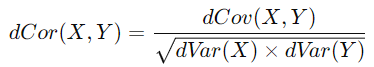

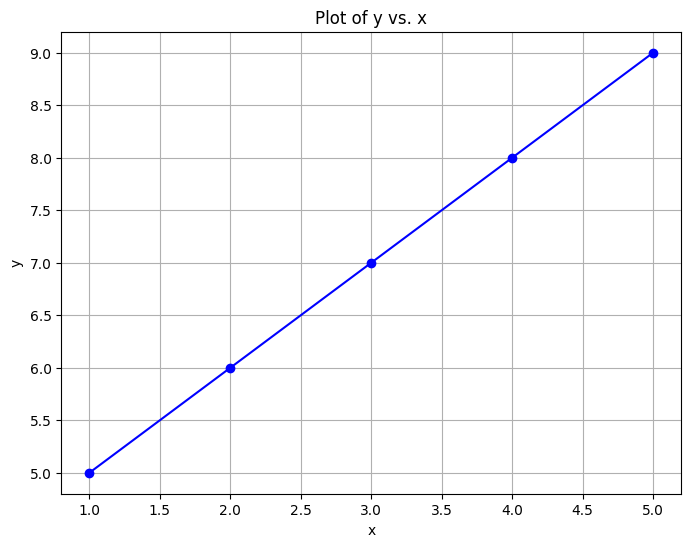

Distance Correlation: 1.0


In [9]:
def distance_matrix(data):
    n = len(data)
    dist_matrix = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            dist_matrix[i][j] = abs(data[i] - data[j])

    return dist_matrix

def double_centered_matrix(dist_matrix):
    n = len(dist_matrix)
    row_means = [sum(row) / n for row in dist_matrix]
    col_means = [sum(col) / n for col in zip(*dist_matrix)]
    overall_mean = sum(row_means) / n

    centered_matrix = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            centered_matrix[i][j] = (dist_matrix[i][j]
                                     - row_means[i]
                                     - col_means[j]
                                     + overall_mean)

    return centered_matrix

def distance_covariance(x, y):
    n = len(x)
    assert len(x) == len(y), "Both vectors must be of the same length"

    dist_matrix_x = distance_matrix(x)
    dist_matrix_y = distance_matrix(y)

    centered_matrix_x = double_centered_matrix(dist_matrix_x)
    centered_matrix_y = double_centered_matrix(dist_matrix_y)

    dist_cov = sum(centered_matrix_x[i][j] * centered_matrix_y[i][j]
                   for i in range(n)
                   for j in range(n)) / (n * n)

    return dist_cov ** 0.5

def distance_variance(x):
    return distance_covariance(x, x)

def distance_correlation(x, y):
    dist_cov_xy = distance_covariance(x, y)
    dist_var_x = distance_variance(x)
    dist_var_y = distance_variance(y)

    if dist_var_x * dist_var_y == 0:
        return 0
    else:
        return dist_cov_xy / (dist_var_x * dist_var_y) ** 0.5

x = [1, 2, 3, 4, 5]
y = [5, 6, 7, 8, 9]

dcor = distance_correlation(x, y)
plot(x,y)
print("Distance Correlation:", dcor)


Let's explore the differences between Pearson and Distance correlation by comparing a few relationships. I’ve defined several relationships between X and Y, both linear and non-linear, and calculated the Pearson and Distance Correlation for each. Let’s take a look at the results.

In [10]:
import numpy as np
# generate linear relationship
x_l = np.linspace(0,10,100)
y_l0 = 2.0+0.1*x_l

# generate exponential linear relationship
x_e = np.linspace(0,10,100)
y_e0 = np.exp((x_e+2) ** 0.5)*x_l


# generate quadriatic relationship
x_q = np.linspace(-10,10,100)
y_q0 = 2.0+0.7*x_q**2 + 0.5*x_q


# generate sinusoidal relationship
x_s = np.linspace(-3,2,100)
y_s0 = np.exp(-(x_s+2) ** 2) + np.cos((x_s-2)**2)

linear relationship
pearson= 0.9999999999999998
dcorr= 0.999999999999999


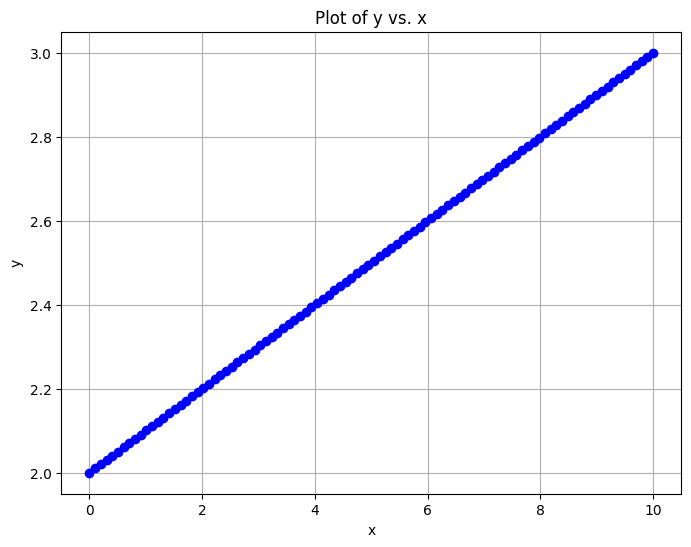

In [12]:
print('linear relationship')
print('pearson=',pearson_correlation(x_l,y_l0))
print('dcorr=',distance_correlation(x_l,y_l0))

plot(x_l, y_l0)


exponential linear relationship
pearson= 0.9552258273331249
dcorr= 0.9748938933663972


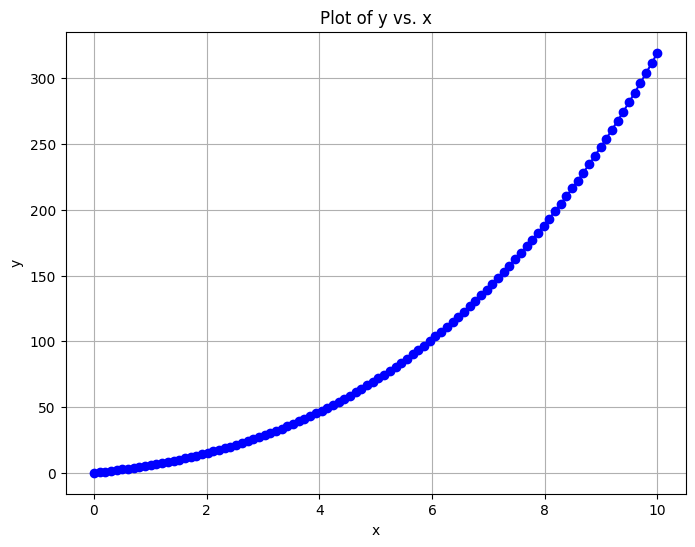

In [13]:

print('\nexponential linear relationship')
print('pearson=',pearson_correlation(x_e,y_e0))
print('dcorr=',distance_correlation(x_e,y_e0))

plot(x_e, y_e0)


quadritic  relationship
pearson= 0.13569812627453134
dcorr= 0.5048135300577155


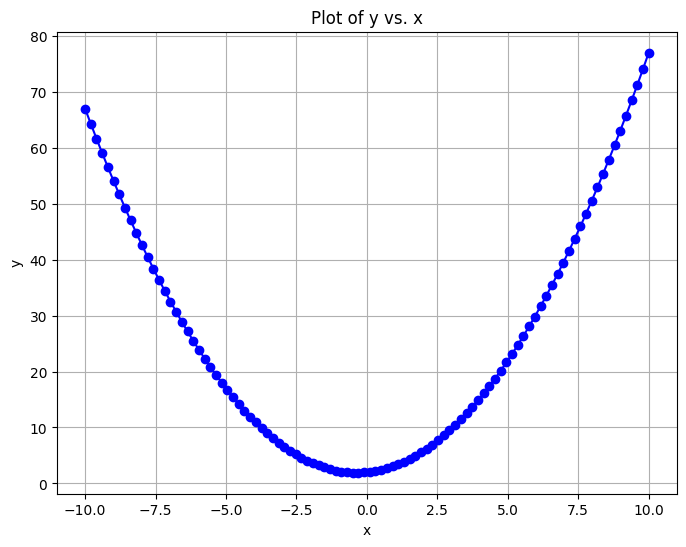

In [14]:

print('\nquadritic  relationship')
print('pearson=',pearson_correlation(x_q,y_q0))
print('dcorr=',distance_correlation(x_q,y_q0))

plot(x_q, y_q0)


sinusoidal relationship
pearson= -0.12362460633319423
dcorr= 0.3555637475766602


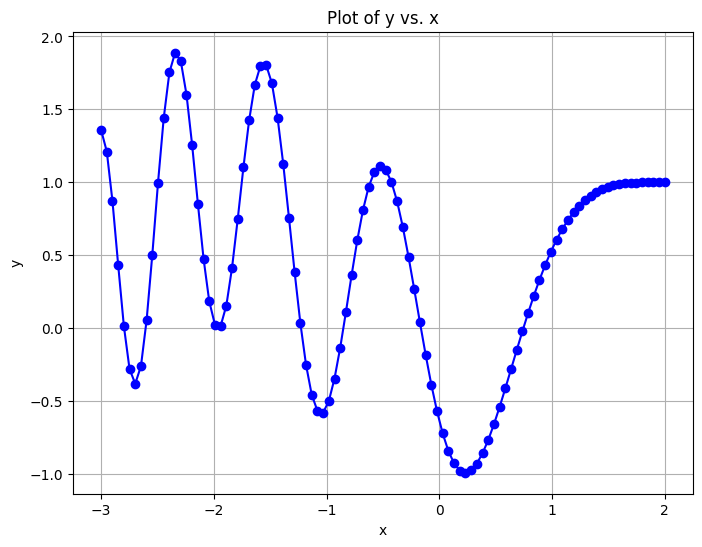

In [15]:

print('\nsinusoidal relationship')
print('pearson=',pearson_correlation(x_s,y_s0))
print('dcorr=',distance_correlation(x_s,y_s0))
plot(x_s, y_s0)

#### Interpretation

Both Pearson and Distance correlation effectively capture linear and exponential relationships.

However, for quadratic relationships, Distance correlation performs better than Pearson, though it still shows only a weak correlation.

Similarly, Distance correlation seems to be more responsive to sinusoidal patterns, but the values aren’t strong enough to definitively indicate a relationship.

It's also worth noting that Distance correlation doesn't indicate the direction (positive or negative) of the correlation, which makes sense because relationships like sinusoidal ones don’t have a clear direction (consider this point?).